In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphonebased-recognition-of-hapt/activity_labels.txt
/kaggle/input/smartphonebased-recognition-of-hapt/README.txt
/kaggle/input/smartphonebased-recognition-of-hapt/features_info.txt
/kaggle/input/smartphonebased-recognition-of-hapt/features.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp28_user14.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp45_user22.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp15_user08.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp05_user03.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/gyro_exp13_user07.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp43_user21.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp11_user06.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/gyro_exp26_user13.txt
/kaggle/input/smartphonebased-recognition-of-hapt/RawData/acc_exp39_user19.txt
/kaggle/input/smartphoneb

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [16]:
X_train = np.loadtxt("../input/smartphonebased-recognition-of-hapt/Train/X_train.txt")
y_train = np.loadtxt("../input/smartphonebased-recognition-of-hapt/Train/y_train.txt").astype(int)

In [17]:
X_test = np.loadtxt("../input/smartphonebased-recognition-of-hapt/Test/X_test.txt")
y_test = np.loadtxt("../input/smartphonebased-recognition-of-hapt/Test/y_test.txt").astype(int)

In [18]:
print(X_train.shape)

(7767, 561)


In [19]:
print(X_test.shape)

(3162, 561)


In [20]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [22]:
print("Accuracy of Linear SVM on original dataset: {}".format(accuracy))

Accuracy of Linear SVM on original dataset: 0.9519291587602783


In [23]:
print("Weighted F1_score of Linear SVM on original dataset: {}".format(f1_weighted))

Weighted F1_score of Linear SVM on original dataset: 0.9517238176876386


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.95      0.78      0.86        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32
          10       0.75      0.72      0.73        25
          11       0.70      0.65      0.67        49
          12       0.72      0.67      0.69        27

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



<AxesSubplot:>

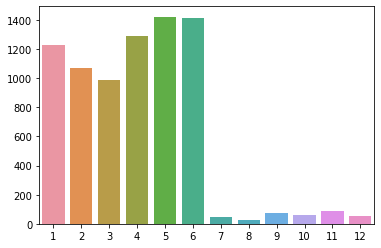

In [25]:
values, counts = np.unique(y_train, return_counts=True)
sns.barplot(x=values,y=counts)

<AxesSubplot:>

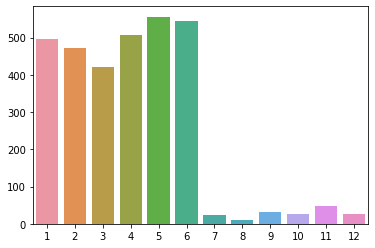

In [26]:
values, counts = np.unique(y_test, return_counts=True)
sns.barplot(x=values,y=counts)

# Resampling

To deal with the imbalanced nature of this dataset, SMOTE will be performed to balanced out the data. Specifically, after SMOTE-ing, all classes will have the same number of instances as the one with the most originally.

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state=42)

In [29]:
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

In [30]:
clf.fit(X_train_smoted, y_train_smoted)

SVC(kernel='linear')

In [31]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [32]:
print("Accuracy of Linear SVM on SMOTEd dataset: {}".format(accuracy))

Accuracy of Linear SVM on SMOTEd dataset: 0.9516129032258065


In [33]:
print("Weighted F1_score of Linear SVM on SMOTEd dataset: {}".format(f1_weighted))

Weighted F1_score of Linear SVM on SMOTEd dataset: 0.9514035758577899


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.95      0.78      0.86        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32
          10       0.75      0.72      0.73        25
          11       0.70      0.65      0.67        49
          12       0.72      0.67      0.69        27

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



Using SMOTE, we obtain an improvement of 0.05% in terms of performance.

# Dimensionality Reduction
Among 561 features given in the dataset, there must be some unnecessary attributes. To improve the model's running time, LDA will be used to perform dimensionality reduction

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=10)), ('svm', clf)]
model = Pipeline(steps=steps)

In [37]:
model.fit(X_train, y_train)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=10)),
                ('svm', SVC(kernel='linear'))])

In [38]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [39]:
print("Accuracy of Linear SVM on LDA-transformed dataset: {}".format(accuracy))

Accuracy of Linear SVM on LDA-transformed dataset: 0.9506641366223909


In [40]:
print("Weighted F1_score of Linear SVM on LDA-transformed dataset: {}".format(f1_weighted))

Weighted F1_score of Linear SVM on LDA-transformed dataset: 0.9505571359047656


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.98      0.97       471
           3       1.00      0.97      0.98       420
           4       0.95      0.88      0.92       508
           5       0.90      0.96      0.93       556
           6       1.00      1.00      1.00       545
           7       0.78      0.91      0.84        23
           8       1.00      1.00      1.00        10
           9       0.71      0.84      0.77        32
          10       0.57      0.52      0.54        25
          11       0.87      0.69      0.77        49
          12       0.52      0.56      0.54        27

    accuracy                           0.95      3162
   macro avg       0.85      0.86      0.85      3162
weighted avg       0.95      0.95      0.95      3162



As seen above, the model's performance decreased in minuscule fashion (around 0.15%) compared to the original dataset

In [42]:
for i in range(1, len(np.unique(y_train))):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('svm', SVC(kernel='linear'))]
    model = Pipeline(steps=steps)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    print("Weighted F1_score of Linear SVM on LDA-transformed dataset with {} components: {}".format(i, f1_weighted))

Weighted F1_score of Linear SVM on LDA-transformed dataset with 1 components: 0.4560323714997334
Weighted F1_score of Linear SVM on LDA-transformed dataset with 2 components: 0.6217936950506182
Weighted F1_score of Linear SVM on LDA-transformed dataset with 3 components: 0.748551690736396
Weighted F1_score of Linear SVM on LDA-transformed dataset with 4 components: 0.7966681805090196
Weighted F1_score of Linear SVM on LDA-transformed dataset with 5 components: 0.8125491594960712
Weighted F1_score of Linear SVM on LDA-transformed dataset with 6 components: 0.8695706119974475
Weighted F1_score of Linear SVM on LDA-transformed dataset with 7 components: 0.9455719411924026
Weighted F1_score of Linear SVM on LDA-transformed dataset with 8 components: 0.9464209326488655
Weighted F1_score of Linear SVM on LDA-transformed dataset with 9 components: 0.9473325533602154
Weighted F1_score of Linear SVM on LDA-transformed dataset with 10 components: 0.9505571359047656
Weighted F1_score of Linear SV

Fortunately, we picked the right number of components at the start. LDA with 10 components gives the best result. 

# PCA
Instead of using LDA, PCA will be adopted for dimensionality reduction.

In [43]:
from sklearn.decomposition import PCA

In [44]:
steps = [('pca', PCA(n_components=10)), ('svm', SVC(kernel='linear'))]
model = Pipeline(steps=steps)

In [45]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=10)), ('svm', SVC(kernel='linear'))])

In [46]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [47]:
print("Accuracy of Linear SVM on PCA-transformed dataset: {}".format(accuracy))

Accuracy of Linear SVM on PCA-transformed dataset: 0.8545224541429475


In [48]:
print("Weighted F1_score of Linear SVM on original dataset: {}".format(f1_weighted))

Weighted F1_score of Linear SVM on original dataset: 0.8531849348257834


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.98      0.93       496
           2       0.87      0.89      0.88       471
           3       0.92      0.80      0.85       420
           4       0.79      0.74      0.76       508
           5       0.78      0.85      0.82       556
           6       1.00      0.97      0.98       545
           7       0.57      0.52      0.55        23
           8       0.67      0.80      0.73        10
           9       0.45      0.41      0.43        32
          10       0.55      0.64      0.59        25
          11       0.52      0.53      0.53        49
          12       0.53      0.33      0.41        27

    accuracy                           0.85      3162
   macro avg       0.71      0.71      0.70      3162
weighted avg       0.86      0.85      0.85      3162



10 components setup gives a bad performance with a 10% decrease in accuracy. Instead of fixing the number of components, iterate through a few values to find ones that give the best performance.

In [50]:
for i in range(10, 31):
    steps = [('pca', PCA(n_components=i, random_state=0)), ('svm', SVC(kernel='linear'))]
    model = Pipeline(steps=steps)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    print("Weighted F1_score of Linear SVM on PCA-transformed dataset with {} components: {}".format(i, f1_weighted))

Weighted F1_score of Linear SVM on PCA-transformed dataset with 10 components: 0.8531969122981691
Weighted F1_score of Linear SVM on PCA-transformed dataset with 11 components: 0.8527690627738769
Weighted F1_score of Linear SVM on PCA-transformed dataset with 12 components: 0.8528550617098556
Weighted F1_score of Linear SVM on PCA-transformed dataset with 13 components: 0.855386288874915
Weighted F1_score of Linear SVM on PCA-transformed dataset with 14 components: 0.857684522756916
Weighted F1_score of Linear SVM on PCA-transformed dataset with 15 components: 0.8542887975859921
Weighted F1_score of Linear SVM on PCA-transformed dataset with 16 components: 0.8522638169367049
Weighted F1_score of Linear SVM on PCA-transformed dataset with 17 components: 0.853484188188854
Weighted F1_score of Linear SVM on PCA-transformed dataset with 18 components: 0.8517257729069359
Weighted F1_score of Linear SVM on PCA-transformed dataset with 19 components: 0.8567274026591191
Weighted F1_score of Li

# SMOTE + LDA
Overall, LDA-10-components and SMOTE gives the best performance so let's try to combine them to see whether performance rises

In [51]:
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

In [52]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=10)), ('svm', SVC(kernel='linear'))]
model = Pipeline(steps)

In [53]:
model.fit(X_train_smoted, y_train_smoted)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=10)),
                ('svm', SVC(kernel='linear'))])

In [54]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [55]:
print("Accuracy of Linear SVM on SMOTEd and LDA-transformed dataset: {}".format(accuracy))

Accuracy of Linear SVM on SMOTEd and LDA-transformed dataset: 0.9146110056925996


In [56]:
print("Weighted F1_score of Linear SVM on SMOTEd and LDA-transformed dataset: {}".format(f1_weighted))

Weighted F1_score of Linear SVM on SMOTEd and LDA-transformed dataset: 0.914428854224223


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.96      0.95      0.95       471
           3       1.00      0.95      0.97       420
           4       0.85      0.79      0.82       508
           5       0.82      0.88      0.85       556
           6       1.00      1.00      1.00       545
           7       0.95      0.87      0.91        23
           8       1.00      1.00      1.00        10
           9       0.71      0.78      0.75        32
          10       0.74      0.56      0.64        25
          11       0.78      0.73      0.76        49
          12       0.65      0.74      0.69        27

    accuracy                           0.91      3162
   macro avg       0.87      0.85      0.86      3162
weighted avg       0.92      0.91      0.91      3162



Thus a combination of SMOTE and LDA does not work.

# Changing of regularization parameter
The final attempt to improve SVM accuracy is to change C

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {"C": [0.1, 1, 2, 5, 10, 50, 100]}
model  = SVC(kernel='linear')
grid_cv = GridSearchCV(model, param_grid, scoring='f1_weighted', n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 5, 10, 50, 100]},
             scoring='f1_weighted')

In [64]:
print("Best parameters on training data {}".format(grid_cv.best_params_))

Best parameters on training data {'C': 2}


In [65]:
print("Best parameters on training data {}".format(grid_cv.best_score_))

Best parameters on training data 0.9327288659017251


In [66]:
y_pred = grid_cv.predict(X_test)
print("Weighted F1_score of Best Linear SVM model on original dataset: {}".format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1_score of Best Linear SVM model on original dataset: 0.9507557000816521


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.88      0.92       508
           5       0.90      0.97      0.93       556
           6       1.00      1.00      1.00       545
           7       0.95      0.78      0.86        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32
          10       0.75      0.72      0.73        25
          11       0.70      0.65      0.67        49
          12       0.72      0.67      0.69        27

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



# RBF SVM
Instead of just using SVM, let's experiment with RBF kernel instead

In [68]:
rbf_svm = SVC(kernel='rbf')

In [69]:
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       0.92      0.95      0.94       471
           3       0.99      0.91      0.95       420
           4       0.93      0.89      0.91       508
           5       0.91      0.95      0.93       556
           6       1.00      1.00      1.00       545
           7       0.86      0.78      0.82        23
           8       1.00      0.80      0.89        10
           9       0.64      0.88      0.74        32
          10       0.67      0.72      0.69        25
          11       0.82      0.55      0.66        49
          12       0.71      0.56      0.63        27

    accuracy                           0.94      3162
   macro avg       0.87      0.83      0.84      3162
weighted avg       0.94      0.94      0.94      3162



Let's try it on SMOTEd data

In [71]:
rbf_svm.fit(X_train_smoted, y_train_smoted)

SVC()

In [72]:
y_pred = rbf_svm.predict(X_test)
print("Accuracy of RBF SVM model on SMOTEd dataset: {}".format(accuracy_score(y_test, y_pred)))

Accuracy of RBF SVM model on SMOTEd dataset: 0.9427577482605946


In [73]:
print("Weighted F1_score of RBF SVM model on SMOTEd dataset: {}".format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1_score of RBF SVM model on SMOTEd dataset: 0.9427116345145959


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.98      0.96       496
           2       0.94      0.96      0.95       471
           3       0.99      0.93      0.96       420
           4       0.93      0.91      0.92       508
           5       0.92      0.94      0.93       556
           6       1.00      1.00      1.00       545
           7       0.86      0.83      0.84        23
           8       0.91      1.00      0.95        10
           9       0.63      0.69      0.66        32
          10       0.74      0.80      0.77        25
          11       0.71      0.71      0.71        49
          12       0.77      0.63      0.69        27

    accuracy                           0.94      3162
   macro avg       0.86      0.86      0.86      3162
weighted avg       0.94      0.94      0.94      3162



In [75]:
for i in range(1, len(np.unique(y_train))):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('rbf_svm', rbf_svm)]
    model = Pipeline(steps=steps)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    print("Weighted F1_score of RBF SVM on LDA-transformed dataset with {} components: {}".format(i, f1_weighted))

Weighted F1_score of RBF SVM on LDA-transformed dataset with 1 components: 0.4685283529007594
Weighted F1_score of RBF SVM on LDA-transformed dataset with 2 components: 0.6197460934354533
Weighted F1_score of RBF SVM on LDA-transformed dataset with 3 components: 0.7339314959712679
Weighted F1_score of RBF SVM on LDA-transformed dataset with 4 components: 0.787452310325499
Weighted F1_score of RBF SVM on LDA-transformed dataset with 5 components: 0.8059056893713453
Weighted F1_score of RBF SVM on LDA-transformed dataset with 6 components: 0.8738410998040675
Weighted F1_score of RBF SVM on LDA-transformed dataset with 7 components: 0.9473301508985471
Weighted F1_score of RBF SVM on LDA-transformed dataset with 8 components: 0.9474705209041818
Weighted F1_score of RBF SVM on LDA-transformed dataset with 9 components: 0.9509852157589866
Weighted F1_score of RBF SVM on LDA-transformed dataset with 10 components: 0.9512757141240238
Weighted F1_score of RBF SVM on LDA-transformed dataset with

Let's explore more on the model with 11 components after LDA

In [76]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=11)), ('rbf_svm', rbf_svm)]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       496
           2       0.97      0.98      0.98       471
           3       1.00      0.98      0.99       420
           4       0.95      0.88      0.91       508
           5       0.90      0.96      0.93       556
           6       1.00      1.00      1.00       545
           7       0.88      0.96      0.92        23
           8       1.00      1.00      1.00        10
           9       0.69      0.75      0.72        32
          10       0.74      0.56      0.64        25
          11       0.77      0.69      0.73        49
          12       0.67      0.74      0.70        27

    accuracy                           0.95      3162
   macro avg       0.88      0.87      0.87      3162
weighted avg       0.95      0.95      0.95      3162

